In [1]:
# We put our code here!

In [2]:
with open('./YelpAPIKeys.txt','r') as f:
    count = 0
    for line in f:
        if count == 0:
            CLIENT_ID = line.strip()
        if count == 1:
            API_KEY = line.strip()
        count+=1

In [3]:
print(CLIENT_ID,"\n",API_KEY)

UFH0gcOYhVYWXEqxTXqoiQ 
 ovv6T1Nhr_IMsxMQWLbe2K1kbo2AELjJ09yqk0VkiZcvdpksEqs1q4SoOpfLLUPxsHHz5tq5_oShbmfunhpn9G2qeY_xeGMqdwgTMYC2sWVXu9uULmqi32aAI-3ZW3Yx


In [4]:
API_HOST = 'https://api.yelp.com' 
SEARCH_PATH = '/v3/businesses/search' 
BUSINESS_PATH = '/v3/businesses/'

In [5]:
!pip install requests

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
def get_restaurants(api_key,location,number=15):
    import requests
    
    search_data = {
    'term': "restaurant",
    'location': location.replace(' ', '+'),
    'limit': number
    }
    url = API_HOST + SEARCH_PATH
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }
    response = requests.request('GET', url, headers=headers, params=search_data).json()
    businesses = response.get('businesses')
    return businesses

In [7]:
rests = get_restaurants(API_KEY,"Chinatown, New York, NY")
rests

[{'id': '0CjK3esfpFcxIopebzjFxA',
  'alias': 'joes-shanghai-new-york-2',
  'name': "Joe's Shanghai",
  'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/ekUo5egd4dlE7zJyb4-Leg/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/joes-shanghai-new-york-2?adjust_creative=UFH0gcOYhVYWXEqxTXqoiQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=UFH0gcOYhVYWXEqxTXqoiQ',
  'review_count': 5498,
  'categories': [{'alias': 'shanghainese', 'title': 'Shanghainese'},
   {'alias': 'seafood', 'title': 'Seafood'},
   {'alias': 'venues', 'title': 'Venues & Event Spaces'}],
  'rating': 4.0,
  'coordinates': {'latitude': 40.7146691442891,
   'longitude': -73.9977602206654},
  'transactions': [],
  'price': '$$',
  'location': {'address1': '9 Pell St',
   'address2': '',
   'address3': '',
   'city': 'New York',
   'zip_code': '10013',
   'country': 'US',
   'state': 'NY',
   'display_address': ['9 Pell St', 'New York, NY 10013']},
  'phone': '+12122338888',
  'displa

In [8]:
!pip install bs4 

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [9]:
from bs4 import BeautifulSoup
import requests

In [10]:
# get all restaurants attributes
all_rests = dict()

for i in rests:
    
    each_rest = dict()
    
    # for attributes from API
    name = i['name']
    
    each_rest['categories'] = i['categories']
    each_rest['rating'] = i['rating']
    each_rest['distance'] = i['distance']
    each_rest['is_closed'] = i['is_closed']
    
    # for attributes from web scraping url
    url = i['url']
    try: 
        response = requests.get(url)
        results_page = BeautifulSoup(response.content,'lxml') 
        info = results_page.find_all('div',class_="ywidget")[2].find_all('dl')
        
        for i in info:
            r = i.find('dt').get_text().strip(' ')[33:-1]
            v = i.find('dd').get_text().strip(' ')[33:-1]
            each_rest[r] = v

        price = results_page.find_all('div',class_="price-category")[0].find_all('span')[1].get_text()
        
        if price =='$' or price == '$$' or price == '$$$' or price == '$$$$':
            each_rest['price']= price 
            
        else: 
            price = results_page.find_all('div',class_="price-category")[1].find_all('span')[1].get_text()
            each_rest['price']= price 


        all_rests[name] = each_rest
    
    except:
        pass

all_rests

{"Joe's Shanghai": {'categories': [{'alias': 'shanghainese',
    'title': 'Shanghainese'},
   {'alias': 'seafood', 'title': 'Seafood'},
   {'alias': 'venues', 'title': 'Venues & Event Spaces'}],
  'rating': 4.0,
  'distance': 176.17294074236378,
  'is_closed': False,
  'd by Vegetarians': '',
  'Takes Reservations': 'No',
  'Delivery': 'No',
  'Take-out': 'Yes',
  'Accepts Credit Cards': 'No',
  'Accepts Apple Pay': 'No',
  'Accepts Google Pay': 'No',
  'Good For': 'Lunch, Dinner',
  'Parking': 'Street',
  'Bike Parking': 'No',
  'Good for Kids': 'Yes',
  'Good for Groups': 'Yes',
  'Attire': 'Casual',
  'Ambience': 'Casual',
  'Noise Level': 'Loud',
  'Alcohol': 'Beer & Wine Only',
  'Happy Hour': 'No',
  'Outdoor Seating': 'No',
  'Wi-Fi': 'No',
  'Has TV': 'No',
  'Dogs Allowed': 'No',
  'Waiter Service': 'Yes',
  'Caters': 'No',
  'price': '$$'},
 'Shinsen': {'categories': [{'alias': 'sushi', 'title': 'Sushi Bars'}],
  'rating': 4.0,
  'distance': 49.94162021049989,
  'is_closed': 

In [11]:
# decision_criteria = [category, 

In [12]:
count = 0 
for i in list(all_rests.values()):
    if count == 0:
        print(i.keys())
        count += 1

dict_keys(['categories', 'rating', 'distance', 'is_closed', 'd by Vegetarians', 'Takes Reservations', 'Delivery', 'Take-out', 'Accepts Credit Cards', 'Accepts Apple Pay', 'Accepts Google Pay', 'Good For', 'Parking', 'Bike Parking', 'Good for Kids', 'Good for Groups', 'Attire', 'Ambience', 'Noise Level', 'Alcohol', 'Happy Hour', 'Outdoor Seating', 'Wi-Fi', 'Has TV', 'Dogs Allowed', 'Waiter Service', 'Caters', 'price'])


In [13]:
url = 'https://www.yelp.com/biz/dun-huang-new-york-3?adjust_creative=UFH0gcOYhVYWXEqxTXqoiQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=UFH0gcOYhVYWXEqxTXqoiQ'
response = requests.get(url)    
results_page = BeautifulSoup(response.content,'lxml') 
results_page

<!DOCTYPE HTML>
<!--[if lt IE 7 ]> <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie6 ie ltie9 ltie8 no-js" lang="en"> <![endif]--><!--[if IE 7 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie7 ie ltie9 ltie8 no-js" lang="en"> <![endif]--><!--[if IE 8 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie8 ie ltie9 no-js" lang="en"> <![endif]--><!--[if IE 9 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie9 ie no-js" lang="en"> <![endif]--><!--[if (gt IE 9)|!(IE)]><!--><html class="no-js" lang="en" xmlns:fb="http://www.facebook.com/2008/fbml"> <!--<![endif]-->
<head>
<script>
            (function() {
                var main = null;

                var main=function(){window.onerror=function(k,a,c,i,f){var j=(document.getElementsByTagName("html")[0].getAttribute("webdriver")==="true"||navigator.userAgent==="selenium");var h=f&&(f.name==="ServerSideRenderingError"||f.name==="CSRFallbackError");if(j&&!h){document.body.innerHTML=

In [25]:
# for text mining

def get_business_review(api_key,business_id):
    import json
    import requests
    business_path = BUSINESS_PATH + business_id+"/reviews"
    url = API_HOST + business_path

    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }


    response = requests.request('GET', url, headers=headers).json()
   
    review_text = ''
    for review in response['reviews']:
        review_text += review['text']
    return review_text

In [31]:
flat_top_review = get_business_review(API_KEY,'flat-top-new-york')
# flat_top_review = get_business_review(API_KEY, "Aunt Jake's")
flat_top_review

"I've only eaten in the restaurant a couple times, but their delivery is great. Shrimp and grits were tasty, if a bit sweet; brunch cobb salad was fantastic;...[Español abajo]Staff are super nice the menú in my opinión is too simple and lack of variety. I ordered a burger tht was great. I put 3 stars because is...We made a preshow reservation for Friday at 6 pm, and definitely didn't need it, though the place was hopping by 7.\n\nThey dealt admirably with our picky..."

In [16]:
def get_reviews(location,number=15):

    restaurants = get_restaurants(API_KEY,location,number)

    if not restaurants:
        return None
    review_list = list()
    for restaurant in restaurants:
        restaurant_name = restaurant['name']
        restaurant_id = restaurant['id']
        review_text = get_business_review(API_KEY,restaurant_id)
        
        review_list.append((restaurant_name,review_text))
    return review_list

In [17]:
all_snippets = get_reviews("Columbia University, New York, NY")

In [18]:
all_snippets

[('Dun Huang',
  "I came here after class with a friend and we shared four dishes (I came to taste he came to eat) we tried three Cold noodle dishes: spicy noodle, orange...Came here on a rainy night and the restaurant was busy. Many of the items on the menu looked spicy and we don't have a high tolerance with spice so we both...Food was wonderful, we ordered the traditional Lanzhou noodles, the mung bean jelly, and the lamb kebab (delicious, with just the right touch of fattiness..."),
 ('Flat Top',
  "I've only eaten in the restaurant a couple times, but their delivery is great. Shrimp and grits were tasty, if a bit sweet; brunch cobb salad was fantastic;...[Español abajo]Staff are super nice the menú in my opinión is too simple and lack of variety. I ordered a burger tht was great. I put 3 stars because is...We made a preshow reservation for Friday at 6 pm, and definitely didn't need it, though the place was hopping by 7.\n\nThey dealt admirably with our picky..."),
 ("e's BAR",
  "

In [19]:
def get_pos_neg_words():
    def get_words(url):
        import requests
        words = requests.get(url).content.decode('latin-1')
        word_list = words.split('\n')
        index = 0
        while index < len(word_list):
            word = word_list[index]
            if ';' in word or not word:    
                word_list.pop(index)
            else:
                index+=1
        return word_list

    #Get lists of positive and negative words
    p_url = 'http://ptrckprry.com/course/ssd/data/positive-words.txt'
    n_url = 'http://ptrckprry.com/course/ssd/data/negative-words.txt'
    positive_words = get_words(p_url)
    negative_words = get_words(n_url)
    return positive_words,negative_words

positive_words,negative_words = get_pos_neg_words()

p = set(positive_words)
n = set(negative_words)


In [21]:
# for comment word cloud 

!pip install wordcloud
!pip install matplotlib

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

    100% |████████████████████████████████| 368kB 3.1MB/s eta 0:00:01
    100% |████████████████████████████████| 13.9MB 99kB/s  eta 0:00:01  2% |▉                               | 348kB 32.3MB/s eta 0:00:01
    100% |████████████████████████████████| 2.0MB 719kB/s eta 0:00:01
You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    99% |████████████████████████████████| 12.9MB 15.4MB/s eta 0:00:01   61% |███████████████████▋            | 7.9MB 48.0MB/s eta 0:00:01    100% |████████████████████████████████| 12.9MB 110kB/s 
    100% |████████████████████████████████| 952kB 1.4MB/s eta 0:00:01
    100% |████████████████████████████████| 61kB 6.1MB/s eta 0:00:01
You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


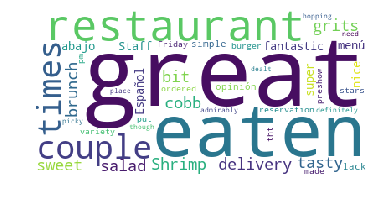

In [28]:
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white').generate(flat_top_review)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()